In [2]:
pip install tabulate

  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd                        
import numpy as np                          
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                    
import seaborn as sns                      
                        

In [4]:
df = pd.read_csv("data.csv")
df.head()      #  reading First 5 rows

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [6]:
df.tail() # Reading last 5 rows

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,10294,61,0.189


In [8]:
df.shape # Shape of the data in the form  of tuples is (no.of rows,no.of columns)

(10127, 19)

In [9]:
df.columns  ## Showing arrays of the column names

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [11]:
df.info()  # returns information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10034 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10067 non-null  float64
 14  Total_

In [12]:
df.isnull().sum()  # isnull() shows the null values and sum() shows the sum of null values

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                       93
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

# Level-1 (Analysis)

In [13]:
# separting categorical and continous(numerical) values

In [17]:
def separate_data_types(df):
    categorical = []
    continous = []
    for column in df.columns:
        if df[column].nunique()<50:   # nunique returns the count of unique values
            categorical.append(column)
        else:
            continous.append(column)
    return categorical, continous 
categorical, continuous = separate_data_types(df) 
        

In [18]:
from tabulate import tabulate    ##tabulate is used to print the list, dict or any data sets in a proper format; in table format
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,"continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Gender                    Customer_Age
Education_Level           Dependent_count
Marital_Status            Credit_Limit
Income_Category           Total_Revolving_Bal
Card_Category             Avg_Open_To_Buy
Months_on_book            Total_Trans_Amt
Total_Relationship_Count  Total_Trans_Ct
Months_Inactive_12_mon    Avg_Utilization_Ratio
Contacts_Count_12_mon


# Univariate Analysis

In [29]:
def info_of_cat(col): 
    
    # unique returns the unique values in the col
    print(f"Unique values in {col} are: {df[col].unique()}") 
    
    # mode: returns the mode of the column
    print(f"Mode of {col} is {df[col].mode()[0]}")  #if we dont want to show with index we use mode()[] if we use mode() it shows with index
    
    # isnull().sum() counts the number of null in dataframe
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}")
    
    #` check if null values are present
    if df[col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {col} column")

In [30]:
df['Attrition_Flag'].mode()[0]  

'Existing Customer'

# Attrition_flag column

In [32]:
info_of_cat("Attrition_Flag")

Unique values in Attrition_Flag are: ['Existing Customer' 'Attrited Customer']
Mode of Attrition_Flag is Existing Customer
Number of missing values in Attrition_Flag is 0


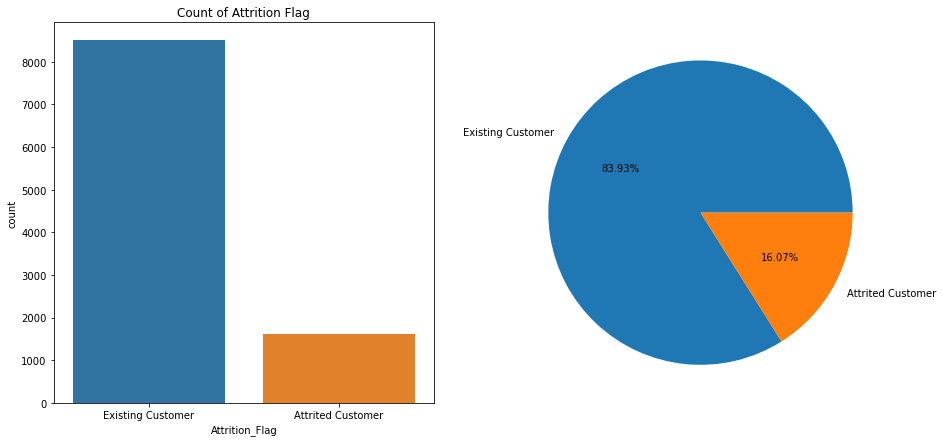

In [49]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))  # Taking axis 0 column with 2 rows

# Set the title of the graph
ax[0].set_title("Count of Attrition Flag")  

# value_counts: returns the count of values in series: return series
value_df = df["Attrition_Flag"].value_counts()  ##value_df is type of series

# Converting the index of value counts into list
labels = list(df["Attrition_Flag"].value_counts().index)

##plotting
sns.countplot(x = df["Attrition_Flag"], ax = ax[0])

plt.pie(value_df,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()


In [38]:
type(percentage)

pandas.core.series.Series

In [41]:
percentage

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [44]:
df["Attrition_Flag"].value_counts().index

Index(['Existing Customer', 'Attrited Customer'], dtype='object')

# Gender column

In [52]:
df['Gender'].isnull().sum()

93

In [55]:
info_of_cat("Gender")

Unique values in Gender are: ['M' 'F' nan]
Mode of Gender is F
Number of missing values in Gender is 93

There are null values in the Gender column


In [64]:
gender_mode = df.Gender.mode()[0]
print(gender_mode)
df["Gender"].fillna(gender_mode, inplace = True)

F


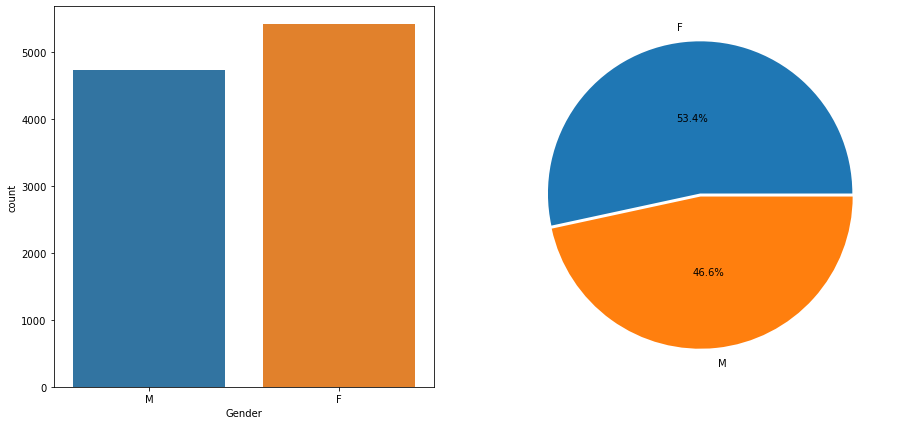

In [70]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))  # Taking axis 0 column with 2 rows

data = df["Gender"].value_counts()                                                                                                     
labels =data.keys()                                                  
                                                                     
sns.countplot(x = df["Gender"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", explode = [0.02, 0.0], labels = labels, pctdistance = 0.5) 
                                                                     
                                                                     
                                                                       

plt.show()


In [66]:
labels

Index(['F', 'M'], dtype='object')

# Dependent count

In [71]:
info_of_cat("Dependent_count")

Unique values in Dependent_count are: [  3   5   4   2   0   1   9  29 103  22  25  78  90  35  60  42 119 104
  88  48  34 143 100  59 130  95   7  82  69  92 110  17  10  27  19 109
 142 116 113 125  80  63  24  97 102  52  87  11 117  13  67  89  61  72
 120  76]
Mode of Dependent_count is 3
Number of missing values in Dependent_count is 0


In [72]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

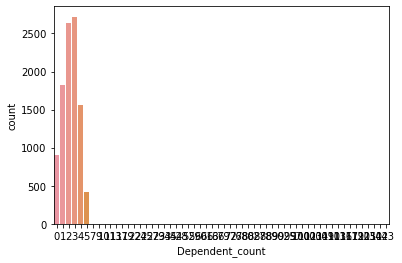

In [74]:
fig, ax = plt.subplots()
ax = sns.countplot(x = df["Dependent_count"])
plt.show()

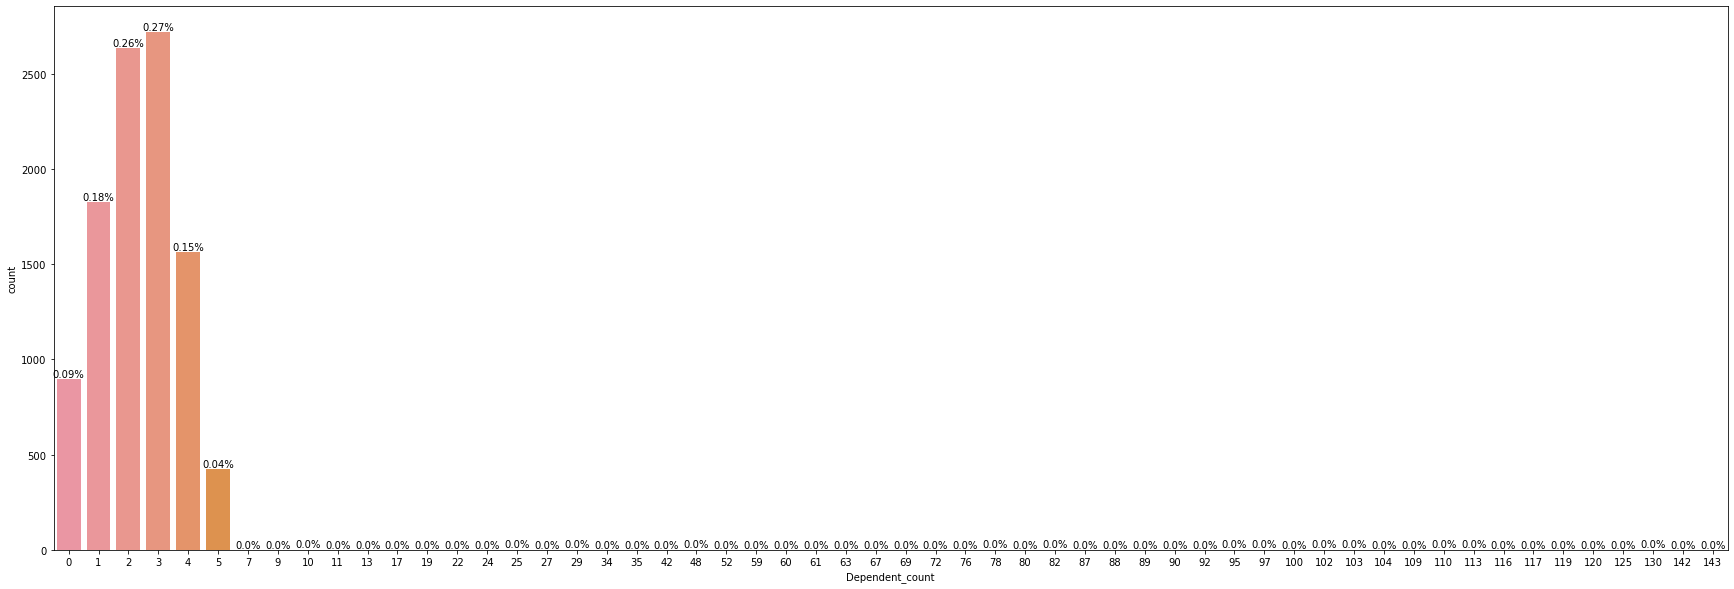

In [85]:
fig, ax = plt.subplots()
ax = sns.countplot(x = df["Dependent_count"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
    fig.set_figheight(10)                                                             # annotate: used to annotate over objects, here objects are the bars
    fig.set_figwidth(30)
plt.show()

In [75]:
bar.get_height()

1

In [76]:
len(df)

10127

In [82]:
(bar.get_height() /len(df))

9.874592673052236e-05

In [87]:
a = []
for bar in ax.patches:
    a.append(bar)
print(len(a))


56


In [91]:
#for bar in ax.patches:
    #print(bar)

In [94]:
#for bar in ax.patches:
    #print(bar.get_height())

In [96]:
#for bar in ax.patches:
    #print(len(df))

In [100]:
#for bar in ax.patches:
    #print(f"{round(bar.get_height() /len(df), 2)}%")

# outliers of Dependent count

In [113]:
# Making changes in data
mean = int(df.Dependent_count.mean())

# accessing the data higher than 6
x = df[df["Dependent_count"] > 5].index

for index in x:
    df.loc[index, "Dependent_count"] = mean  

In [114]:
x

Int64Index([], dtype='int64')

In [115]:
info_of_cat('Dependent_count')

Unique values in Dependent_count are: [3 5 4 2 0 1]
Mode of Dependent_count is 3
Number of missing values in Dependent_count is 0


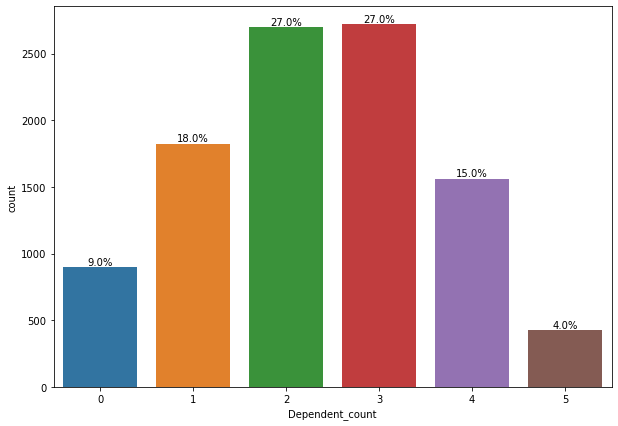

In [126]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Dependent_count"])

for bar in ax.patches:                                              
    percentage = f"{round((bar.get_height() /len(df))*100, 0)}%"          
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
    #fig.set_figheight(10)                                                             # annotate: used to annotate over objects, here objects are the bars
    #fig.set_figwidth(20)
                                                                    
plt.show()

# Education level

In [127]:
info_of_cat( "Education_Level")

Unique values in Education_Level are: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Mode of Education_Level is Graduate
Number of missing values in Education_Level is 0


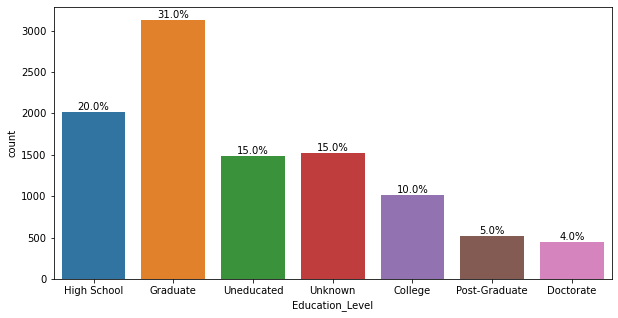

In [131]:
fig, ax = plt.subplots()
ax = sns.countplot(x = df['Education_Level'])
for bar in ax.patches:                                              
    percentage = f"{round((bar.get_height() /len(df))*100, 0)}%"           
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
    fig.set_figheight(5)                                                             # annotate: used to annotate over objects, here objects are the bars
    fig.set_figwidth(10)
    
plt.show()

# Marital status

In [133]:
info_of_cat("Marital_Status")

Unique values in Marital_Status are: ['Married' 'Single' 'Unknown' 'Divorced']
Mode of Marital_Status is Married
Number of missing values in Marital_Status is 0


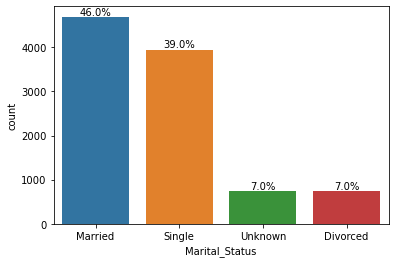

In [136]:
fig, ax = plt.subplots()
ax = sns.countplot(x = df['Marital_Status'])
for bar in ax.patches:                                              
    percentage = f"{round((bar.get_height() /len(df))*100, 0)}%"           
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
    
    
plt.show()

# Card_Category

In [143]:
info_of_cat( "Card_Category")

Unique values in Card_Category are: ['Blue' 'Gold' 'Silver' nan 'Platinum']
Mode of Card_Category is Blue
Number of missing values in Card_Category is 132

There are null values in the Card_Category column


In [145]:
df['Card_Category'].isnull().sum()

132

In [147]:
Card_mode = df.Card_Category.mode()[0]
print(Card_mode)
df["Card_Category"].fillna(Card_mode, inplace = True)

Blue


Blue        93.285277
Silver       5.371778
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64


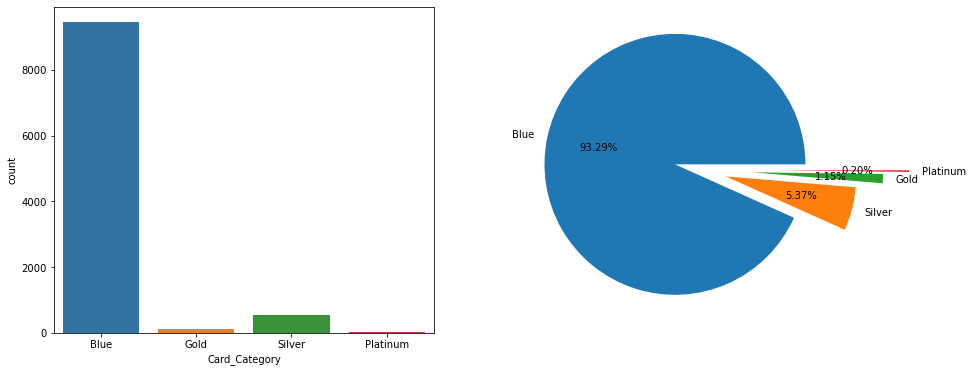

In [155]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
percentage = (df["Card_Category"].value_counts()/len(df))*100      
                                                                         
print(percentage)
sns.countplot(x = df["Card_Category"], ax = ax[0])
labels = list(df["Card_Category"].value_counts().index)            
                                                                          
ax[1].pie(percentage,labels = labels, autopct= "%0.2f%%",explode = [0.2, 0.2,0.4,0.6])          
plt.show()

# Income_Category

In [137]:
info_of_cat( "Income_Category")

Unique values in Income_Category are: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Mode of Income_Category is Less than $40K
Number of missing values in Income_Category is 0


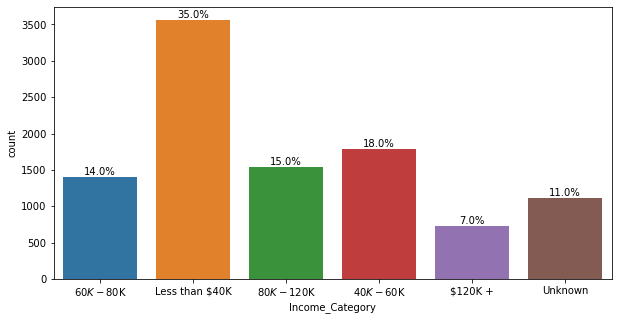

In [142]:
fig, ax = plt.subplots()
ax = sns.countplot(x = df['Income_Category'])
for bar in ax.patches:                                              
    percentage = f"{round((bar.get_height() /len(df))*100, 0)}%"           
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
    fig.set_figheight(5)                                                              
    fig.set_figwidth(10)
    
plt.show()

# Total_Relationship_Count

In [158]:
info_of_cat("Total_Relationship_Count")

Unique values in Total_Relationship_Count are: [5 6 4 3 2 1]
Mode of Total_Relationship_Count is 3
Number of missing values in Total_Relationship_Count is 0


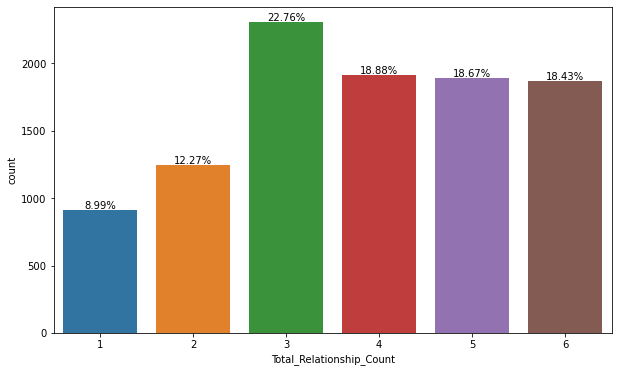

In [159]:
fig, ax = plt.subplots(figsize  = (10 , 6))
ax = sns.countplot(x = df["Total_Relationship_Count"])
bar_percentage(ax, len(df)) 

# Analysis of Numerical

In [188]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [189]:
info_of_numerical("Customer_Age")

The mean of the Customer_Age is 46.32151673743458
The median of the Customer_Age is 46.0
The mode of the Customer_Age is 47
The standard deviation of the Customer_Age is 7.964884053622378
Number of missing values in the Customer_Age is 0


In [190]:
def box_hist(col):
    fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
    sns.histplot(x = df[col], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
    sns.boxplot(x = df[col], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
    plt.show()


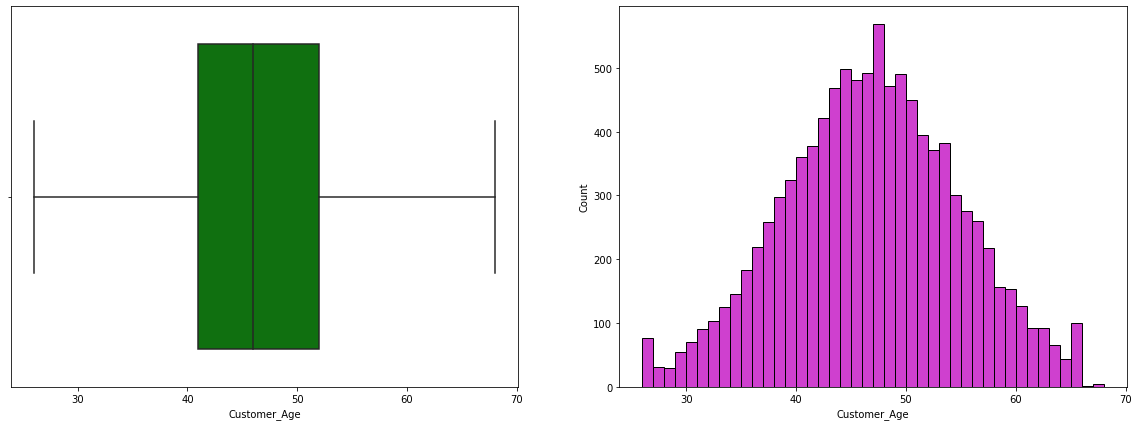

In [191]:
box_hist("Customer_Age")

# Outliers

In [192]:
# Making changes in data
mean = int(df.Customer_Age.mean())

# accessing the data higher than 69
x = df[df["Customer_Age"] > 69].index

for index in x:
    df.loc[index, "Customer_Age"] = mean  

In [193]:
info_of_numerical("Customer_Age")

The mean of the Customer_Age is 46.32151673743458
The median of the Customer_Age is 46.0
The mode of the Customer_Age is 47
The standard deviation of the Customer_Age is 7.964884053622378
Number of missing values in the Customer_Age is 0


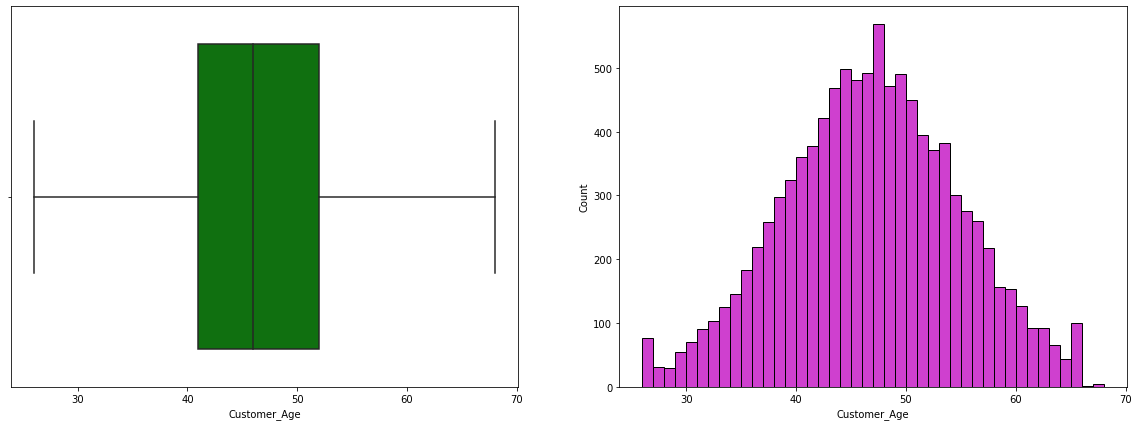

In [194]:
box_hist("Customer_Age")

# Total Revolving blance

In [195]:
info_of_numerical("Total_Revolving_Bal")

The mean of the Total_Revolving_Bal is 1162.8140614199665
The median of the Total_Revolving_Bal is 1276.0
The mode of the Total_Revolving_Bal is 0
The standard deviation of the Total_Revolving_Bal is 814.9873352357697
Number of missing values in the Total_Revolving_Bal is 0


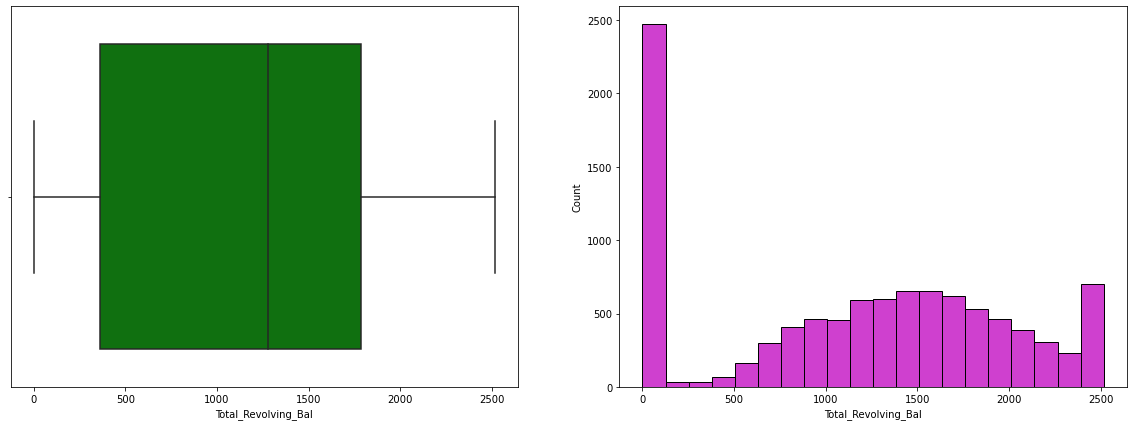

In [196]:
box_hist("Total_Revolving_Bal")

# Avg_Open_To_Buy

In [197]:
info_of_numerical("Avg_Open_To_Buy")

The mean of the Avg_Open_To_Buy is 7469.139636614887
The median of the Avg_Open_To_Buy is 3474.0
The mode of the Avg_Open_To_Buy is 1438.3
The standard deviation of the Avg_Open_To_Buy is 9090.685323679128
Number of missing values in the Avg_Open_To_Buy is 0


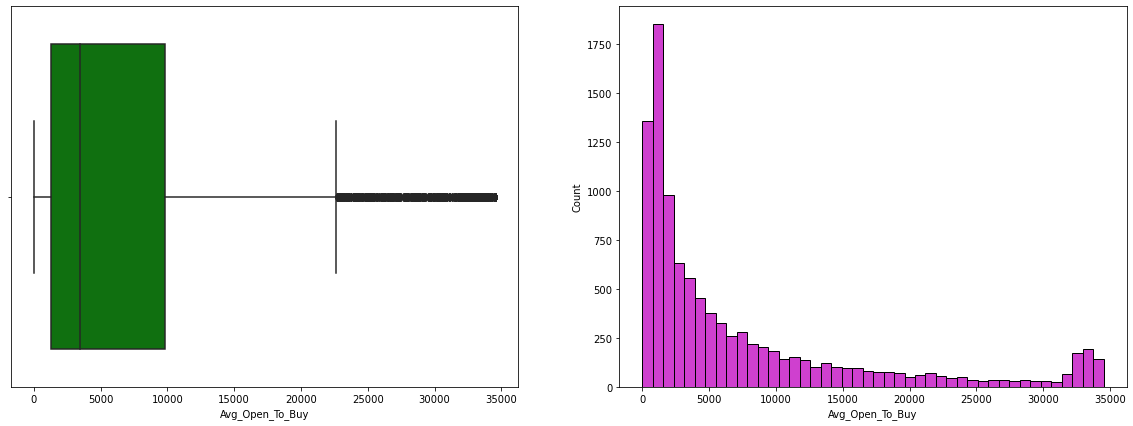

In [198]:
box_hist("Avg_Open_To_Buy")

# outlier Analysis of Avg_open_to_Buy

This is right skewed data but the strength of outliers is increasing at the end of the tail which indicates that outliers are not a human error but some people are showing behavior other than population.

# Level-2(Analysis)

In [199]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Gender                    Customer_Age
Education_Level           Dependent_count
Marital_Status            Credit_Limit
Income_Category           Total_Revolving_Bal
Card_Category             Avg_Open_To_Buy
Months_on_book            Total_Trans_Amt
Total_Relationship_Count  Total_Trans_Ct
Months_Inactive_12_mon    Avg_Utilization_Ratio
Contacts_Count_12_mon


# Analysis of Attrition flag and Gender

In [ ]:
#Categorical to categorical

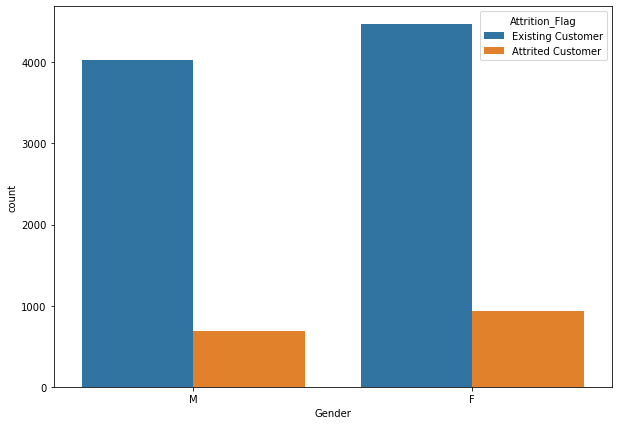

In [200]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Gender", hue = "Attrition_Flag", data = df)
plt.show()

# Relationship of Attrition_Flag with Dependent_count

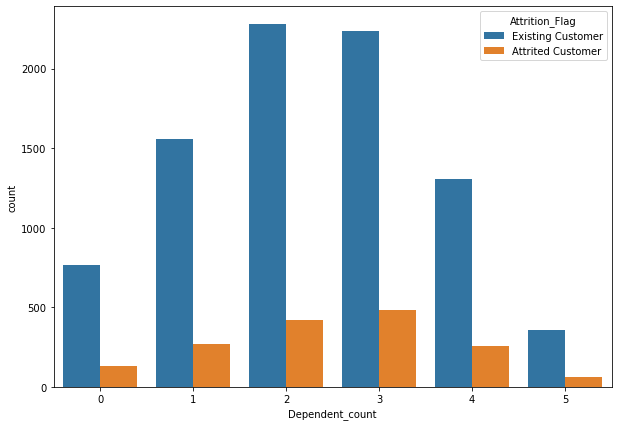

In [216]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Dependent_count", hue = "Attrition_Flag", data = df)
plt.show()

# Attrition_Flag with Education_Level

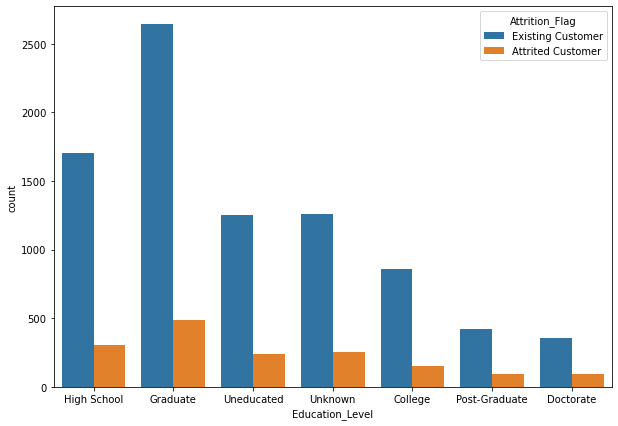

In [217]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Education_Level", hue = "Attrition_Flag", data = df)
plt.show()

In [218]:
def bivarplot(col1,col2):
    fig, ax = plt.subplots(figsize = (10, 7))
    sns.countplot(x = col1, hue = col2, data = df)
    plt.show()
    

# Income category and Attrition Flag

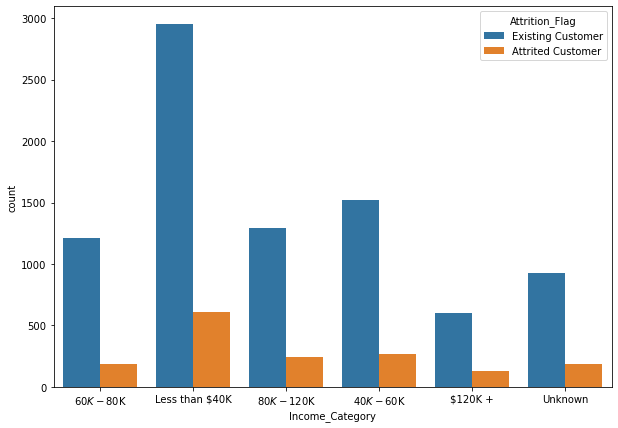

In [221]:
bivarplot("Income_Category","Attrition_Flag")

# Attrition_Flag with Card_Category

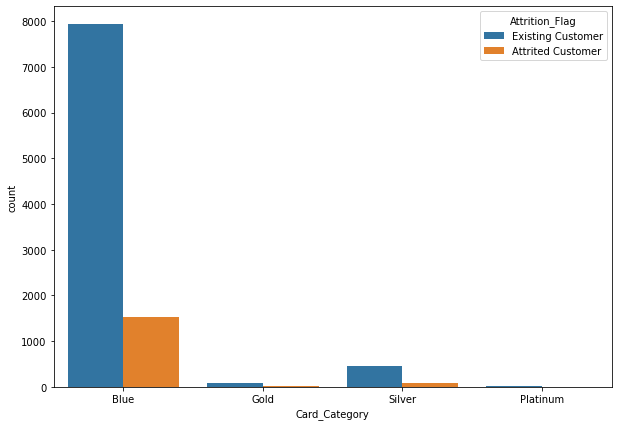

In [222]:
bivarplot("Card_Category","Attrition_Flag")

# CAT-NUM ANALYSIS (relationship between categorical and numerical data) 

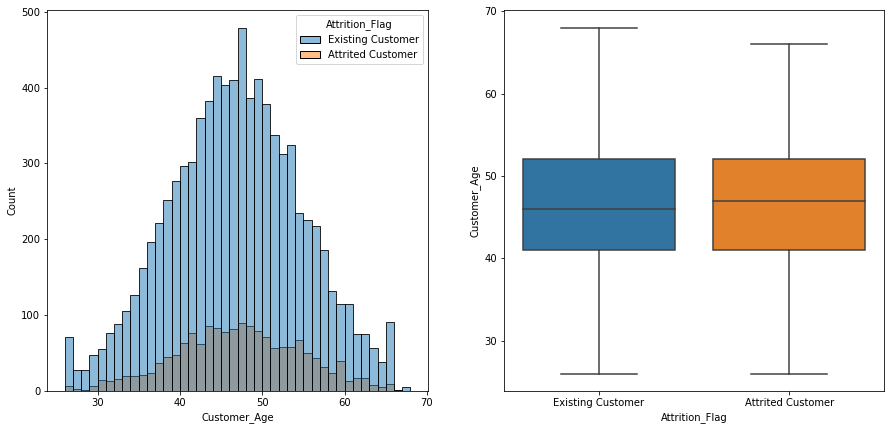

In [232]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Customer_Age"], hue = df["Attrition_Flag"], ax = ax[0])
sns.boxplot(x = df["Attrition_Flag"], y = df["Customer_Age"], ax = ax[1])
plt.show()

In [229]:
def hist_barplot(col1,col2):
    fig, ax = plt.subplots(1, 2, figsize = (15, 7))
    sns.histplot(x = df[col1], hue = df[col2], ax = ax[0])
    sns.boxplot(x = df[col2], y = df[col1], ax = ax[1])
    plt.show()

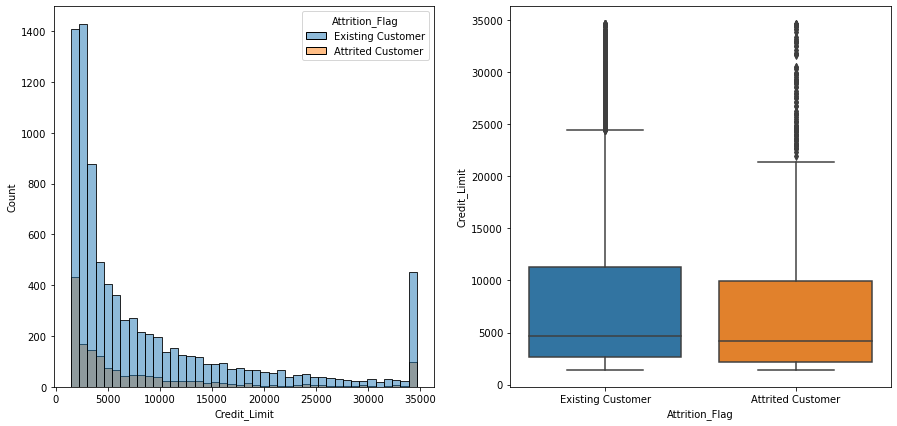

In [230]:
hist_barplot("Credit_Limit","Attrition_Flag")